<a href="https://colab.research.google.com/github/shahad-jeza/kaust_training/blob/main/Linear_Regression_Exercise_IAI_B2_Med.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error , accuracy_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [17]:
!gdown 1nrKDzTkuEKm887q7yxUmeGk7GhjDNhzM

Downloading...
From: https://drive.google.com/uc?id=1nrKDzTkuEKm887q7yxUmeGk7GhjDNhzM
To: /content/housing.csv
100% 1.42M/1.42M [00:00<00:00, 81.0MB/s]


In [18]:
df = pd.read_csv('/content/housing.csv')

In [19]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [21]:
df = df.drop(columns=['ocean_proximity'])

In [22]:
df = df.dropna()

In [23]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [24]:
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Method 1 : using skLearn

In [26]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [27]:
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

In [29]:
train_loss = mean_squared_error(yhat_train, y_train)
test_loss = mean_squared_error(yhat_test, y_test)

In [30]:
print(train_loss)
print(test_loss)

4817977906.765842
4921881237.628168


In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, yhat_test)

0.5838513352926418

In [57]:
y_test.shape
y_test_matrix = y_test.values.reshape(-1, 1)
data_frame = pd.DataFrame({'actual': y_test_matrix.flatten(), 'predicted': yhat_test.flatten() , 'diffrence': (yhat_test.flatten() - y_test_matrix.flatten())**2})
data_frame.head(10)

,actual,predicted,diffrence
0,245800.0,187009.904038,3.456275e+09
1,137900.0,146157.014446,6.817829e+07
2,218200.0,205835.960895,1.528695e+08
3,220800.0,143260.519016,6.012371e+09
4,170500.0,185358.042527,2.207614e+08
5,75000.0,118483.376146,1.890804e+09
6,269400.0,247991.633798,4.583181e+08
7,228900.0,263470.135015,1.195094e+09
8,500001.0,368222.002134,1.736570e+10
9,80800.0,91866.737871,1.224727e+08


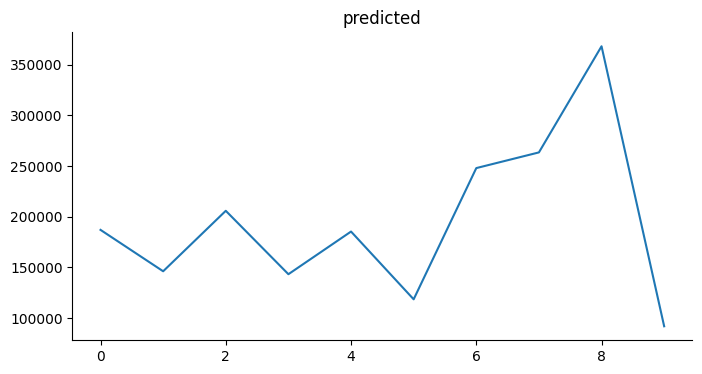

In [52]:
from matplotlib import pyplot as plt
_df_6['predicted'].plot(kind='line', figsize=(8, 4), title='predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

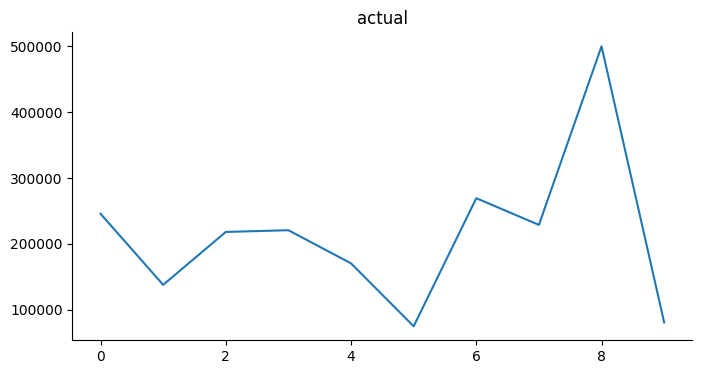

In [51]:
from matplotlib import pyplot as plt
_df_5['actual'].plot(kind='line', figsize=(8, 4), title='actual')
plt.gca().spines[['top', 'right']].set_visible(False)

# Method 2 : using numpy

In [44]:
A = X_train.to_numpy()
A_test = X_test.to_numpy()
train_target= y_train.to_numpy()
test_target = y_test.to_numpy()

In [46]:
# Calculate the weights using the normal equation
w = np.linalg.inv(A.T @ A) @ (A.T @ train_target.reshape(-1,1))

# Compute the predicted values
yhat = A @ w
yhat_test= A_test @ w

print(f'Train MSE: {mean_squared_error(yhat_train, train_target)}')
print(f'Test MSE: {mean_squared_error(yhat_test, test_target)}')


Train MSE: 4817977906.765842
Test MSE: 5690908223.745887
